In [1]:
#Libraries
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numpy import arange
import numpy as np
import seaborn as sns

input_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/EC_OC_Percent_forintrapolation.csv"

df = pd.read_csv(input_csv)

df


,Time,EC_area,Oc_area,Oo_percent
0,67,14315.83789,3904.54535,0.271780
1,68,NaN,NaN,NaN
2,69,NaN,NaN,NaN
3,70,NaN,NaN,NaN
4,71,NaN,NaN,NaN
5,72,NaN,NaN,NaN
6,73,32791.41726,13538.90261,0.434654
7,74,NaN,NaN,NaN
8,75,NaN,NaN,NaN
9,76,NaN,NaN,NaN


In [2]:
#curve from EC_OC_Percent

input2_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/EC_OC_Percent_intra_edited.csv"

df2 = pd.read_csv(input2_csv)
df2.head()

,Time,Int_EC_area,Int_Oc_area,Int_Oo_percent,Int_Oo_percent.1
0,67,14315.83789,3904.54535,27.178018,0.271780
1,68,17395.10112,5510.27156,29.892577,0.298926
2,69,20474.36435,7115.99777,32.607136,0.326071
3,70,23553.62758,8721.72398,35.321695,0.353217
4,71,26632.89080,10327.45019,38.036254,0.380363


In [3]:
x = df2['Time']
y3 = df2['Int_Oo_percent']

p3 = np.polyfit(x, np.log(y3), 1)

f3= lambda x: np.exp(p3[1]) * np.exp(p3[0]*x)

from sklearn.metrics import r2_score 
intercept, slope = p3
R3_square = r2_score(y3, f3(x)) 
print('Coefficient of Determination', R3_square)
print('Intercept:', intercept)
print('Slope:', slope)

Coefficient of Determination 0.9503561276561946
Intercept: 0.06695612544324513
Slope: -1.1442330182605036


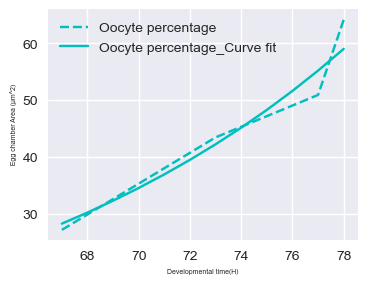

In [4]:

#Actual data

plt.figure(figsize = (4,3))

plt.style.use('seaborn')
plt.plot(x, y3, color = 'c', linestyle = 'dashed')


#Predicted curve fit

plt.plot(x, f3(x), color = 'c')

#Labels
plt.xlabel('Developmental time(H)', fontsize=5)
plt.ylabel(' Egg chamber Area (μm^2)', fontsize=5)
plt.legend(labels=["Oocyte percentage", "Oocyte percentage_Curve fit"], fontsize=10)

plt.xticks(size=10)
plt.yticks(size=10)



#plt.savefig('/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_percentage.pdf', dpi=300, bbox_inches='tight') 


plt.show()

In [5]:
# Calculate and print the values of the fitted curve
for i, x_val in enumerate(x):
    y3_val = f3(x_val)
    print("x =", x_val, ", Fitted y3 =", y3_val)

# Output the fitted exponential equation
print("\nFitted Exponential Equation: y3 =", np.exp(p3[1]), "* e^(", p3[0], "* x)")

x = 67 , Fitted y3 = 28.27074110017109
x = 68 , Fitted y3 = 30.2284493341469
x = 69 , Fitted y3 = 32.321726052719434
x = 70 , Fitted y3 = 34.55995917881656
x = 71 , Fitted y3 = 36.95318673555109
x = 72 , Fitted y3 = 39.51214186472512
x = 73 , Fitted y3 = 42.24830096280141
x = 74 , Fitted y3 = 45.17393515022152
x = 75 , Fitted y3 = 48.30216530490051
x = 76 , Fitted y3 = 51.64702090671181
x = 77 , Fitted y3 = 55.22350295686855
x = 78 , Fitted y3 = 59.04765125438145

Fitted Exponential Equation: y3 = 0.31846808334772786 * e^( 0.06695612544324513 * x)


In [6]:
input4_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/First_ECOcytepercent.csv"

df4 = pd.read_csv(input4_csv)


df4.head(10)

,EC,EC_area,Oo_area,Oo_percentage,DOo_percentage,First_time,Unnamed: 6,FECy,Fixed_yolkproteinEC
0,EC1,48886.85000,25035.69000,51.211502,0.512115,75.873524,NaN,HEC,Fixed_histoneEC
1,EC2,50913.99893,29120.94826,57.196348,0.571963,77.524245,NaN,EC,BM_histones_EC
2,EC3,51541.06339,31283.24655,60.695772,0.606958,78.411154,NaN,Ecy,BM_yolkproteinEC
3,EC4,56708.74000,33451.90000,60.931912,0.609319,78.469147,NaN,NaN,NaN
4,EC5,47667.69801,26198.68625,54.961095,0.549611,76.928863,NaN,NaN,NaN
5,EC6,50676.50112,33843.86218,66.784134,0.667841,79.838827,NaN,NaN,NaN
6,EC7,53149.23000,35668.63000,67.855809,0.678558,80.076587,NaN,NaN,NaN
7,EC8,42379.85000,24261.59000,54.535341,0.545353,76.812718,NaN,NaN,NaN
8,ECy1,6563.48000,3868.29000,36.108580,0.361086,70.654678,NaN,NaN,NaN
9,ECy2,31155.26000,15579.47000,50.005906,0.500059,75.517723,NaN,NaN,NaN


In [11]:
#Libraries
import csv

yOo = df4['Oo_percentage']

# Calculate the corresponding x value using the natural logarithm

xOo = (np.log(yOo/np.exp(p3[1])))/p3[0]


# Create a CSV file and write the xEC values
csv_file_path = '/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_predictedxoutput.csv'  # Provide the desired file path

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write header if needed
    writer.writerow(['xOo'])  # Add a header if necessary
    
    # Write xEC values
    for value in yOo:
        writer.writerow([value])

print(f'The xEC values have been saved to {csv_file_path}')

The xEC values have been saved to /Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_predictedxoutput.csv


In [7]:
#Libraries
import csv
import numpy as np
import pandas as pd

# Assuming df4 is your DataFrame and p3 contains your parameters
# Example:
# df4 = pd.DataFrame({'Oo_percentage': [...]})
# p3 = [slope, intercept]

# Extract the 'Oo_percentage' column
yOo = df4['Oo_percentage']

# Calculate the corresponding xOo value using the natural logarithm
xOo = (np.log(yOo / np.exp(p3[1]))) / p3[0]

# Print the entire xOo dataset
print(xOo)

# Create a CSV file and write the xOo values
csv_file_path = '/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_predictedxoutput.csv'  # Provide the desired file path

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write header
    writer.writerow(['xOo'])
    
    # Write xOo values
    for value in xOo:
        writer.writerow([value])

print(f'The xOo values have been saved to {csv_file_path}')

0     75.873524
1     77.524245
2     78.411154
3     78.469147
4     76.928863
        ...    
85    61.606456
86    58.996991
87    62.976831
88    63.498176
89    56.781231
Name: Oo_percentage, Length: 90, dtype: float64
The xOo values have been saved to /Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/Oocyte_predictedxoutput.csv


In [8]:
# Print the result
print("The corresponding x1 value for y1=", yOo, " is ", xOo)

The corresponding x1 value for y1= 0     51.211502
1     57.196348
2     60.695772
3     60.931912
4     54.961095
        ...    
85    19.701535
86    16.543229
87    21.594779
88    22.361905
89    14.262279
Name: Oo_percentage, Length: 90, dtype: float64  is  0     75.873524
1     77.524245
2     78.411154
3     78.469147
4     76.928863
        ...    
85    61.606456
86    58.996991
87    62.976831
88    63.498176
89    56.781231
Name: Oo_percentage, Length: 90, dtype: float64


In [9]:
input5_csv = "/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/oocyte_percent_increase_v2.csv"


df5 = pd.read_csv(input5_csv)

df5.head()

,Time1,EC1,Unnamed: 2,Time2,EC2,Unnamed: 5,Time3,EC3,Unnamed: 8,Time4,...,GT33,Unnamed: 89,GEC35,GT35,Unnamed: 92,GEC36,GT36,Unnamed: 95,GEC37,GT37
0,76.928861,54.961089,NaN,78.469145,60.931902,NaN,80.076587,67.855810,NaN,75.873525,...,58.996991,NaN,21.594779,62.976831,NaN,22.361905,63.498176,NaN,14.262279,56.781231
1,77.094289,59.663116,NaN,78.651267,63.087226,NaN,80.235368,73.082822,NaN,76.051922,...,60.996991,NaN,22.653592,64.976831,NaN,20.259492,65.498176,NaN,12.761597,58.781231
2,77.259717,63.736813,NaN,78.833389,68.644209,NaN,81.076587,76.482150,NaN,76.230319,...,62.996991,NaN,28.270827,66.976831,NaN,23.796960,67.498176,NaN,14.421685,60.781231
3,77.425144,66.119134,NaN,79.015512,72.163639,NaN,81.235368,74.694854,NaN,76.408717,...,64.996991,NaN,25.523629,68.976831,NaN,28.274577,69.498176,NaN,102.931723,62.781231
4,77.590572,67.486162,NaN,79.197634,76.176328,NaN,82.076587,78.210161,NaN,76.587114,...,NaN,NaN,28.596026,70.976831,NaN,22.952691,71.498176,NaN,NaN,NaN


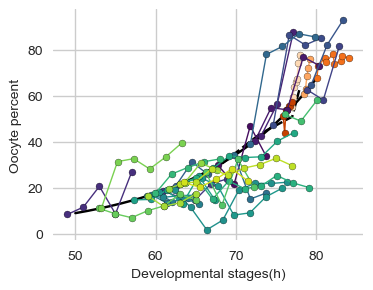

In [10]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
sns.set_style("whitegrid")

plt.rcParams.update({'figure.figsize': (4, 3), 'font.size': 30, 'font.family': 'sans-serif', 'font.sans-serif': "Arial"})

# Plot the initial curve (if needed)
plt.plot(x, y3, color='k', linestyle='dashed')

# Extrapolation (if needed)
x_extended = np.linspace(50, 80, 500)
y_extrapolated = f3(x_extended)
plt.plot(x_extended, y_extrapolated, color='k')

# Define your column groups
time_columns_x = ['Time1', 'Time2', 'Time3', 'Time4', 'GT1', 'GT2', 'GT4', 'GT5', 'GT7', 'GT8', 'GT9', 'GT10', 'GT11', 'GT12', 'GT13', 'GT14', 'GT15', 'GT16', 'GT17', 'GT19', 'GT21', 'GT23', 'GT24', 'GT25', 'GT26', 'GT27', 'GT28', 'GT30', 'GT31', 'GT33', 'GT35', 'GT36']
ec_columns_y = ['EC1', 'EC2', 'EC3', 'EC4', 'GEC1', 'GEC2', 'GEC4', 'GEC5', 'GEC7', 'GEC8', 'GEC9', 'GEC10', 'GEC11', 'GEC12', 'GEC13', 'GEC14', 'GEC15', 'GEC16', 'GEC17', 'GEC19', 'GEC21', 'GEC23', 'GEC24', 'GEC25', 'GEC26', 'GEC27', 'GEC28', 'GEC30', 'GEC31', 'GEC33', 'GEC35', 'GEC36']

# Create two palettes: cooler for small set, warmer for larger set
cool_palette = sns.color_palette("Oranges", 4)   # Cooler colors for first 4
warm_palette = sns.color_palette("viridis", 29)  # Warmer colors for the remaining 29

# Combine both palettes
palette = cool_palette + warm_palette

# Ensure that the DataFrame contains all the columns
required_columns = ec_columns_y + time_columns_x
missing_columns = [col for col in required_columns if col not in df5.columns]
if missing_columns:
    raise ValueError(f"DataFrame is missing columns: {missing_columns}")

# Define marker styles for each column
marker_style_dict = {ec_column: {'markersize': 5, 'edgecolor': 'k', 'linewidth': 0.2} for ec_column in ec_columns_y}

# Plot using the two palettes
for i, ec_column in enumerate(ec_columns_y):
    style = marker_style_dict[ec_column]
    sns.lineplot(x=df5[time_columns_x[i]], y=df5[ec_column], marker='o', markersize=style['markersize'],
                 markeredgecolor=style['edgecolor'],
                 markeredgewidth=style['linewidth'], label=ec_column, color=palette[i], linewidth=1)

plt.xlabel('Developmental stages(h)', fontsize=10)
plt.ylabel('Oocyte percent', fontsize=10)

plt.legend([])
plt.savefig('/Users/shruthibalachandra/Documents/Shruthi_for_mac/Amodeo_Lab/Python/oocyte_percentfitting_first_oovolume_subsetv2.pdf', dpi=300, bbox_inches='tight') 
plt.show()